## 4.28 修改LPF

### a不变

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


def rk4(h, y, inputs, f):
    '''
    用于数值积分的rk4函数。
    args:
        h - 步长
        y - 当前状态量
        inputs - 外界对系统的输入
        f - 常微分或偏微分方程
    return:
        y_new - 新的状态量,即经过h时间之后的状态量
    '''
    k1 = f(y, inputs)
    k2 = f(y + h / 2 * k1, inputs)
    k3 = f(y + h / 2 * k2, inputs)
    k4 = f(y + h * k3, inputs)

    y_new = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_new


def myplot(t, listarray, label, linestyle='-'):
    plt.plot(t, listarray, label=label, linestyle=linestyle)
    plt.legend()


class LowPassFilter:
    """
    current输入当前膜电位,
    history是current历史轨迹,注意历史轨迹初值应该等于当前,
    derivative()是history动力学方程,
    step()返回history,
    update()更新current,
    """

    def __init__(self, a=None, x=None, tau=0.1, dt=1) -> None:
        if a is not None:
            self.a = a
        else:
            assert a is not None, "The current is None."
        if x is None:
            self.x = a
        else:
            self.x = x
        self.tau = tau
        self.dt = dt
        self.anew = self.a
        self.xnew = self.x

    def derivative(self, state, inputs=0):
        x = state
        Dhistory = self.tau * (self.a - x ** 3 + x ** 2 + x)
        return Dhistory

    def step(self, dt, a, inputs=0):
        """
        返回新的历史轨迹
        """
        if dt is None:
            dt = self.dt
        state = self.x
        self.a = a
        statenew = rk4(dt, state, inputs, self.derivative)
        self.xnew = statenew
        self.anew = self.a
        return statenew

    def update(self):
        self.a = self.anew
        self.x = self.xnew


stepNum = 50
start = 0
dt = 1
end = start + stepNum * dt
t = np.linspace(start, end, stepNum)

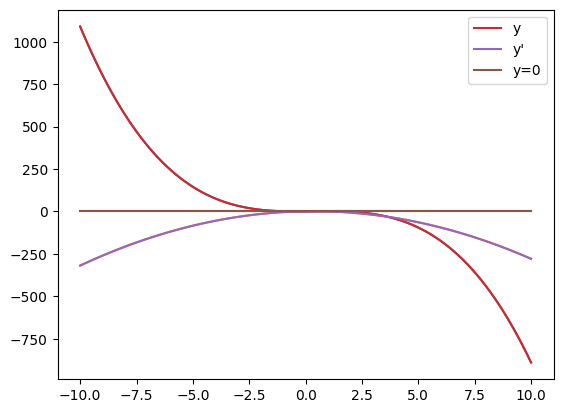

In [201]:
import numpy as np
x = np.linspace(-10, 10, 100)
# x = np.linspace(-1, 2, 100)
y = -x**3 + x**2 + x
plt.plot(x, y)
plt.plot(x, -3*x**2 + 2*x + 1)
plt.plot(x, x*0)
myplot(x, y, 'y')
myplot(x, -3*x**2 + 2*x + 1, 'y\'')
myplot(x, x*0, 'y=0')

In [202]:
def testLPF(a_0, start, stop, step):
    # a_0 = a_0
    # 求解方程
    roots = np.roots([-1, 1, 1, a_0])
    print("方程的根为:", roots)
    for root in roots:
        if np.imag(root) == 0:
            plt.axhline(np.real(root), color='black', linestyle='--',
                        label='root'+str(np.real(root))[:5])
            plt.legend()
    initx = np.arange(start, stop, step)
    a = np.ones_like(initx) * a_0
    LPF = LowPassFilter(a, initx, .05)
    xList = []
    xList.append(initx)
    for _ in range(stepNum-1):
        x = LPF.step(dt, a)
        xList.append(x)
        LPF.update()
    myplot(t, xList, 'x')
    plt.show()
    

方程的根为: [-1.20556943+0.j          1.10278472+0.66545695j  1.10278472-0.66545695j]


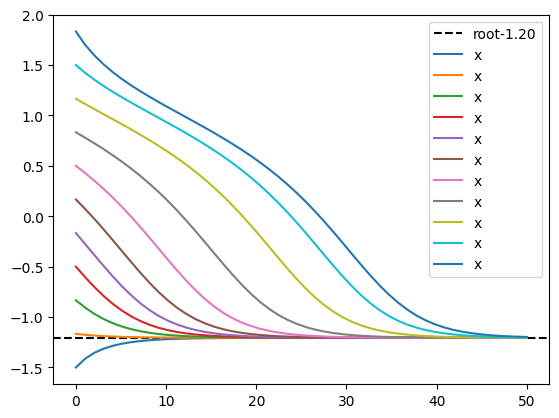

方程的根为: [-1.          0.99999999  1.00000001]


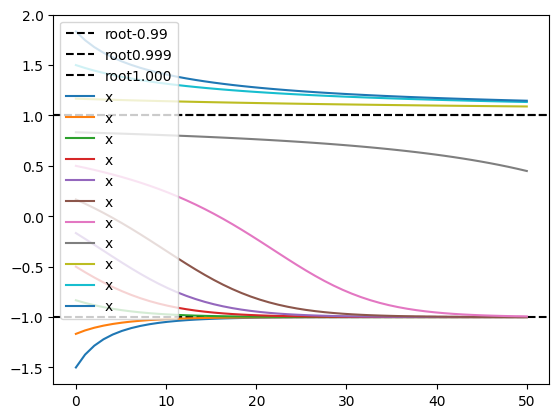

方程的根为: [ 1.61803399 -0.61803399  0.        ]


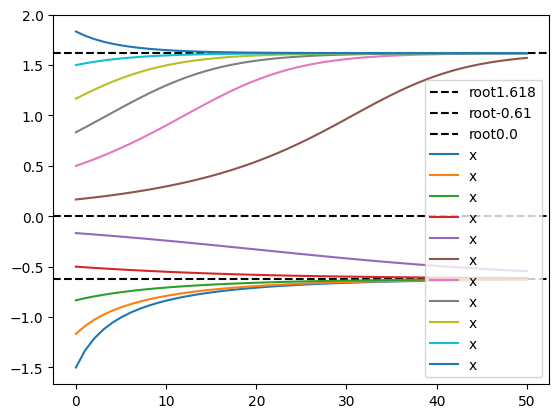

方程的根为: [ 1.66666667+0.00000000e+00j -0.33333333+6.59783539e-09j
 -0.33333333-6.59783539e-09j]


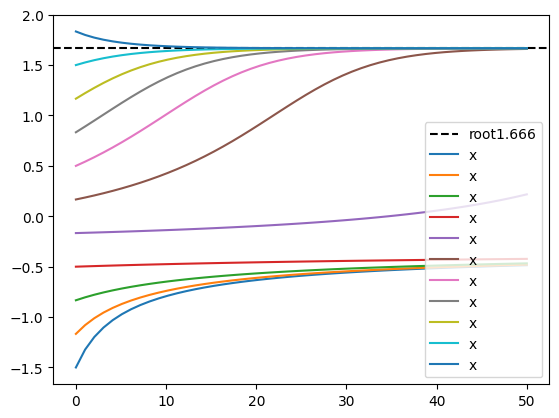

方程的根为: [ 1.83928676+0.j         -0.41964338+0.60629073j -0.41964338-0.60629073j]


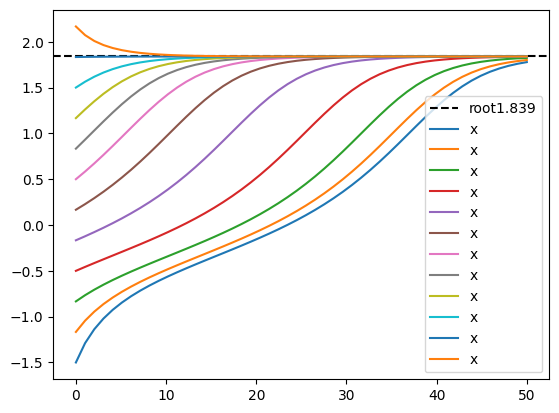

In [204]:
testLPF(-2, -1.5, 2, 1/3)
testLPF(-1, -1.5, 2, 1/3)
testLPF(0, -1.5, 2, 1/3)
testLPF(5/27, -1.5, 2, 1/3)
testLPF(1, -1.5, 2.5, 1/3)

### a变化

In [213]:
from matplotlib import pyplot as plt
import numpy as np


def rk4(h, y, inputs, f):
    '''
    用于数值积分的rk4函数。
    args:
        h - 步长
        y - 当前状态量
        inputs - 外界对系统的输入
        f - 常微分或偏微分方程
    return:
        y_new - 新的状态量,即经过h时间之后的状态量
    '''
    k1 = f(y, inputs)
    k2 = f(y + h / 2 * k1, inputs)
    k3 = f(y + h / 2 * k2, inputs)
    k4 = f(y + h * k3, inputs)

    y_new = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_new


def myplot(t, listarray, label, linestyle='-'):
    plt.plot(t, listarray, label=label, linestyle=linestyle)
    plt.legend()


class LowPassFilter:
    """
    current输入当前膜电位,
    history是current历史轨迹,注意历史轨迹初值应该等于当前,
    derivative()是history动力学方程,
    step()返回history,
    update()更新current,
    """

    def __init__(self, a=None, x=None, tau=0.1, dt=1) -> None:
        if a is not None:
            self.a = a
        else:
            assert a is not None, "The current is None."
        if x is None:
            self.x = a
        else:
            self.x = x
        self.tau = tau
        self.dt = dt
        self.anew = self.a
        self.xnew = self.x

    def derivative(self, state, inputs=0):
        x = state
        Dhistory = self.tau * (self.a - x ** 3 + x ** 2 + x)
        return Dhistory

    def step(self, dt, a, inputs=0):
        """
        返回新的历史轨迹
        """
        if dt is None:
            dt = self.dt
        state = self.x
        self.a = a
        statenew = rk4(dt, state, inputs, self.derivative)
        self.xnew = statenew
        self.anew = self.a
        return statenew

    def update(self):
        self.a = self.anew
        self.x = self.xnew


方程的根为: [-1.20556943+0.j          1.10278472+0.66545695j  1.10278472-0.66545695j]
方程的根为: [ 1.83928676+0.j         -0.41964338+0.60629073j -0.41964338-0.60629073j]


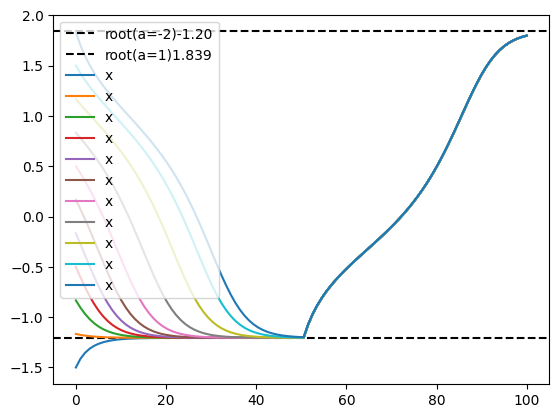

In [214]:
stepNum = 50 * 2
start = 0
dt = 1
end = start + stepNum * dt
t = np.linspace(start, end, stepNum)
init, stop, step = -1.5, 2, 1/3

a_0 = -2
# 求解方程
roots = np.roots([-1, 1, 1, a_0])
print("方程的根为:", roots)
for root in roots:
    if np.imag(root) == 0:
        plt.axhline(np.real(root), color='black', linestyle='--',
                    label='root(a=-2)'+str(np.real(root))[:5])
        plt.legend()
initx = np.arange(init, stop, step)
a = np.ones_like(initx) * a_0
LPF = LowPassFilter(a, initx, .05)
xList = []
xList.append(initx)
for _ in range(int(stepNum/2)):
    x = LPF.step(dt, a)
    xList.append(x)
    LPF.update()

a_0 = 1
roots = np.roots([-1, 1, 1, a_0])
print("方程的根为:", roots)
for root in roots:
    if np.imag(root) == 0:
        plt.axhline(np.real(root), color='black', linestyle='--',
                    label='root(a=1)'+str(np.real(root))[:5])
        plt.legend()
a = np.ones_like(initx) * a_0
for _ in range(int(stepNum/2), stepNum-1):
    x = LPF.step(dt, a)
    xList.append(x)
    LPF.update()
myplot(t, xList, 'x')
plt.show()

a_0_start=-3方程的根为:[-1.35930409+0.j          1.17965204+0.90301315j  1.17965204-0.90301315j]
a_0_start=-2方程的根为:[-1.20556943+0.j          1.10278472+0.66545695j  1.10278472-0.66545695j]


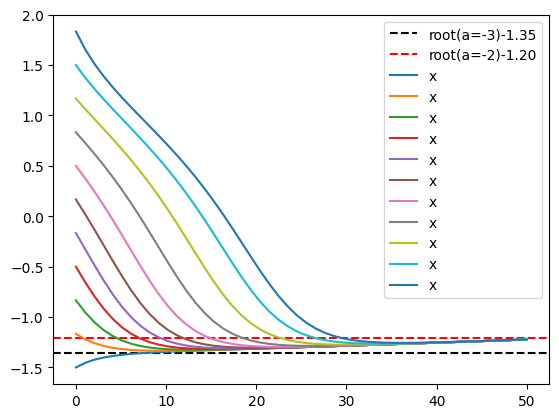

a_0_start=-2方程的根为:[-1.20556943+0.j          1.10278472+0.66545695j  1.10278472-0.66545695j]
a_0_start=-1方程的根为:[-1.          0.99999999  1.00000001]


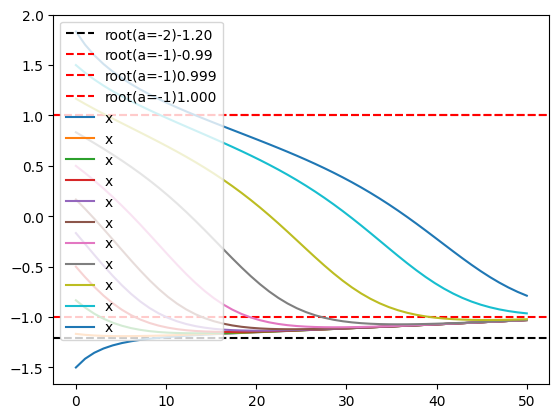

a_0_start=-1方程的根为:[-1.          0.99999999  1.00000001]
a_0_start=0方程的根为:[ 1.61803399 -0.61803399  0.        ]


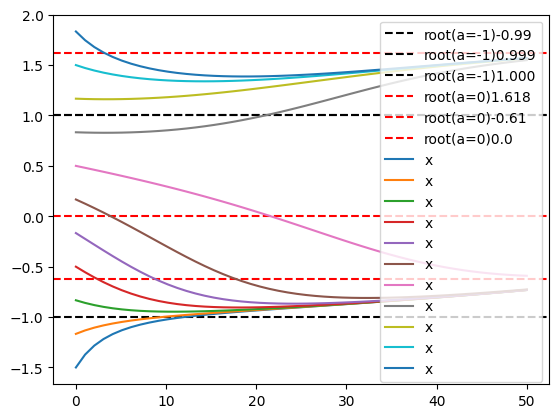

a_0_start=0方程的根为:[ 1.61803399 -0.61803399  0.        ]
a_0_start=0.185方程的根为:[ 1.66666667+0.00000000e+00j -0.33333333+6.59783539e-09j
 -0.33333333-6.59783539e-09j]


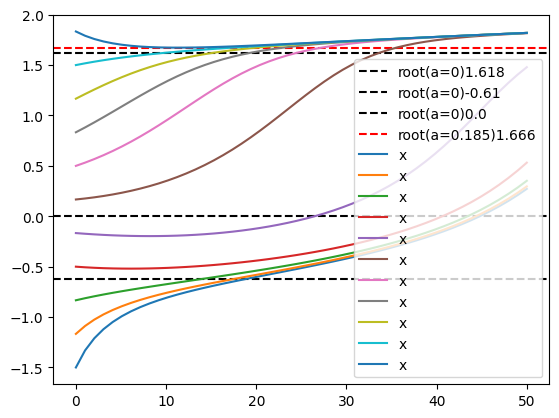

a_0_start=0.185方程的根为:[ 1.66666667+0.00000000e+00j -0.33333333+6.59783539e-09j
 -0.33333333-6.59783539e-09j]
a_0_start=1方程的根为:[ 1.83928676+0.j         -0.41964338+0.60629073j -0.41964338-0.60629073j]


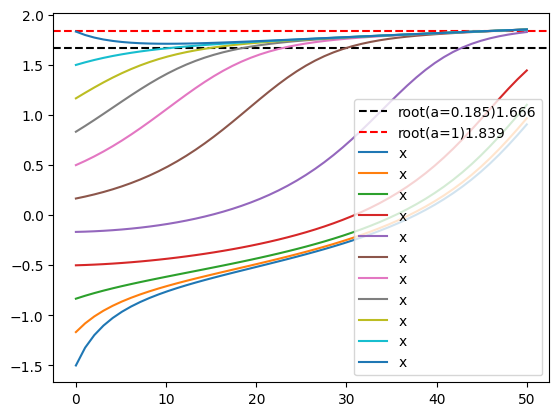

In [238]:
def new_test(a_0_start, a_0_end):
    stepNum = 50 
    start = 0
    dt = 1
    end = start + stepNum * dt
    t = np.linspace(start, end, stepNum)
    init, stop, step = -1.5, 2, 1/3

    a_0_start = a_0_start
    a_0_end = a_0_end
# 求解方程
    roots = np.roots([-1, 1, 1, a_0_start])
    print(f"a_0_start={a_0_start:.3g}方程的根为:{roots}")
    for root in roots:
        if np.imag(root) == 0:
            plt.axhline(np.real(root), color='black', linestyle='--',
                    label='root(a='+f"{a_0_start:.3g}"+')'+str(np.real(root))[:5])
            plt.legend()
    roots = np.roots([-1, 1, 1, a_0_end])
    print(f"a_0_start={a_0_end:.3g}方程的根为:{roots}")
    for root in roots:
        if np.imag(root) == 0:
            plt.axhline(np.real(root), color='r', linestyle='--',
                    label='root(a='+f"{a_0_end:.3g}"+')'+str(np.real(root))[:5])
            plt.legend()
    initx = np.arange(init, stop, step)
    a = np.ones_like(initx) * a_0_start
    LPF = LowPassFilter(a, initx, .05)
    xList = []
    xList.append(initx)
    for i in range(stepNum-1):
        a = np.ones_like(initx) * (i / stepNum + a_0_start) 
    # if i % 10 == 0:
    #     print(a)
        x = LPF.step(dt, a)
        xList.append(x)
        LPF.update()

    myplot(t, xList, 'x')
    plt.show()

new_test(-3, -2)
new_test(-2, -1)
new_test(-1, 0)
new_test(0, 5/27)
new_test(5/27, 1)

## 5.8 

### 2. 实验双吸引子效果

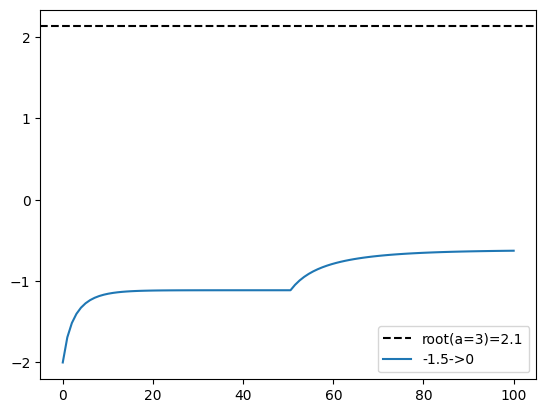

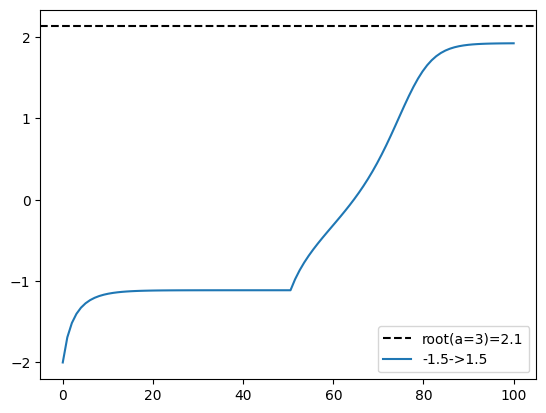

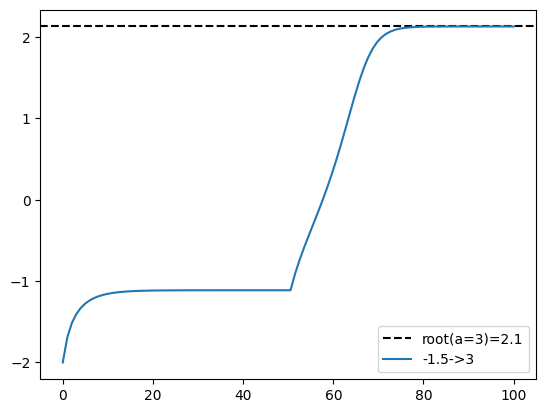

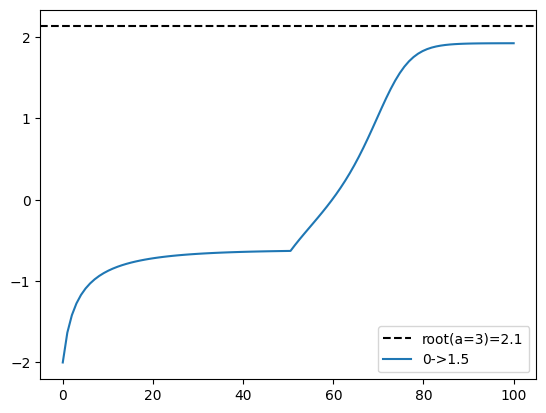

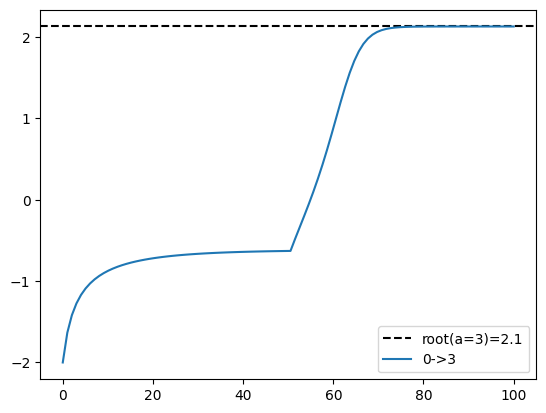

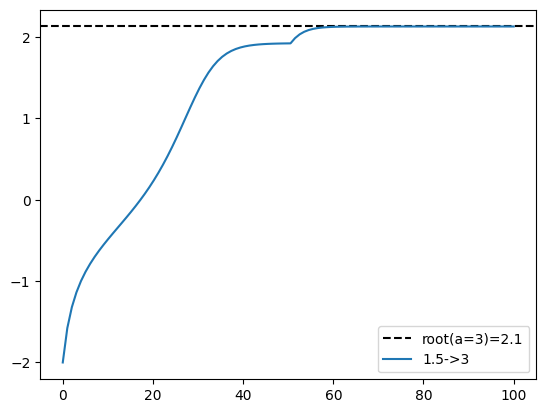

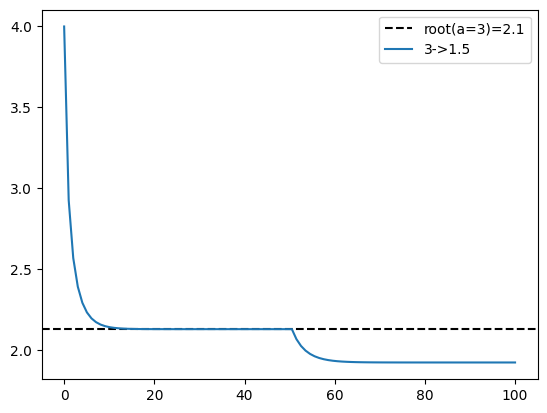

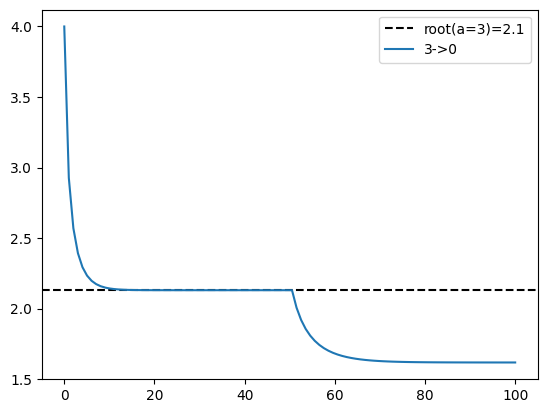

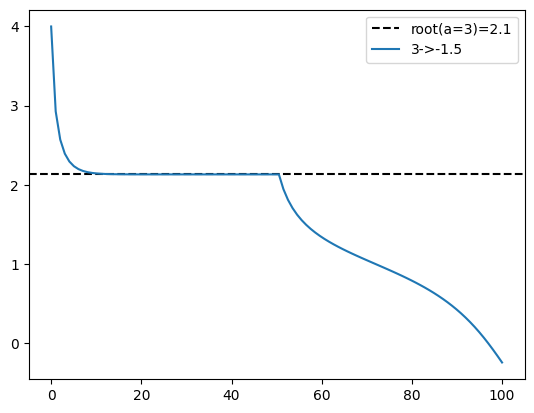

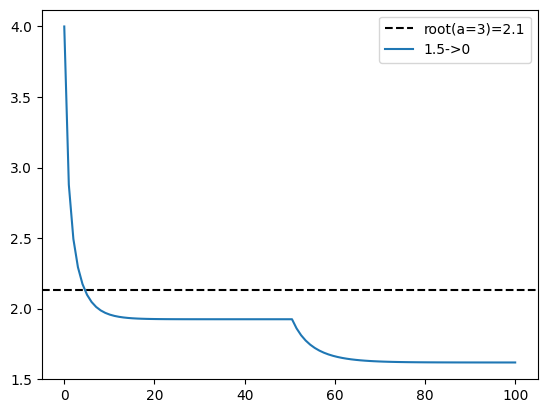

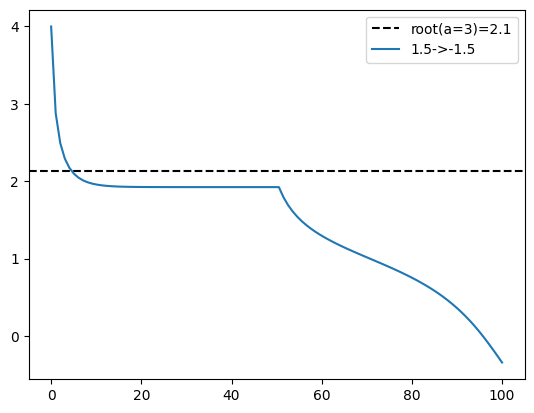

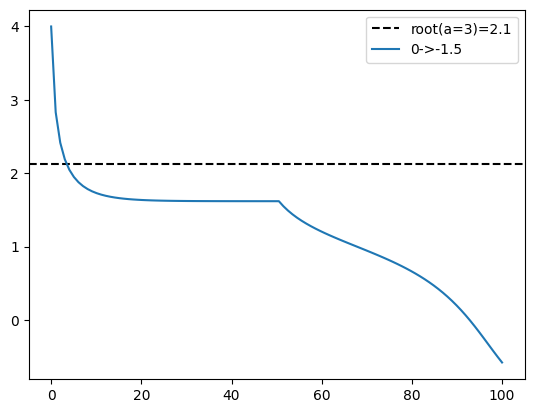

In [265]:
from matplotlib import pyplot as plt
import numpy as np


def rk4(h, y, inputs, f):
    '''
    用于数值积分的rk4函数。
    args:
        h - 步长
        y - 当前状态量
        inputs - 外界对系统的输入
        f - 常微分或偏微分方程
    return:
        y_new - 新的状态量,即经过h时间之后的状态量
    '''
    k1 = f(y, inputs)
    k2 = f(y + h / 2 * k1, inputs)
    k3 = f(y + h / 2 * k2, inputs)
    k4 = f(y + h * k3, inputs)

    y_new = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_new


def myplot(t, listarray, label, linestyle='-'):
    plt.plot(t, listarray, label=label, linestyle=linestyle)
    plt.legend()


class LowPassFilter:
    """
    current输入当前膜电位,
    history是current历史轨迹,注意历史轨迹初值应该等于当前,
    derivative()是history动力学方程,
    step()返回history,
    update()更新current,
    """

    def __init__(self, a=None, x=None, tau=0.1, dt=1) -> None:
        if a is not None:
            self.a = a
        else:
            assert a is not None, "The current is None."
        if x is None:
            self.x = a
        else:
            self.x = x
        self.tau = tau
        self.dt = dt
        self.anew = self.a
        self.xnew = self.x

    def derivative(self, state, inputs=0):
        x = state
        Dhistory = self.tau * (self.a - x ** 3 + x ** 2 + x)
        return Dhistory

    def step(self, dt, a, inputs=0):
        """
        返回新的历史轨迹
        """
        if dt is None:
            dt = self.dt
        state = self.x
        self.a = a
        statenew = rk4(dt, state, inputs, self.derivative)
        self.xnew = statenew
        self.anew = self.a
        return statenew

    def update(self):
        self.a = self.anew
        self.x = self.xnew


def test_func(a_0, a_1):
    stepNum = 50 * 2
    start = 0
    dt = 1
    end = start + stepNum * dt
    t = np.linspace(start, end, stepNum)

    a_high = 3
    roots = np.roots([-1, 1, 1, a_high])
    # print(f"a_high={a_high}方程的根为:{roots}")
    for root in roots:
        if np.imag(root) == 0:
            plt.axhline(np.real(root), color='black', linestyle='--',
                    label='root(a='+f"{a_high:.3g}"+')='+str(np.real(root))[:3])
            plt.legend()

    if a_0 < a_1:    
        initx = np.array(-2)
    else:
        initx = np.array(4)
    
    a = np.ones_like(initx) * a_0
    LPF = LowPassFilter(a, initx, .05)
    xList = []
    xList.append(initx)
    for _ in range(stepNum//2):
        x = LPF.step(dt, a)
        xList.append(x)
        LPF.update()

    a = np.ones_like(initx) * a_1
    for _ in range(stepNum//2, stepNum-1):
        x = LPF.step(dt, a)
        xList.append(x)
        LPF.update()
        
    myplot(t, xList, str(a_0)+'->'+str(a_1))
    plt.show()

test_func(-1.5, 0)
test_func(-1.5, 1.5)
test_func(-1.5, 3)
test_func(0, 1.5)
test_func(0, 3)
test_func(1.5, 3)

test_func(3, 1.5)
test_func(3, 0)
test_func(3, -1.5)
test_func(1.5, 0)
test_func(1.5, -1.5)
test_func(0, -1.5)

### 3. 对环境模拟学习 

In [266]:
# 测试lpf，neuron，synapse功能
from matplotlib import pyplot as plt
import numpy as np


def rk4(h, y, inputs, f):
    '''
    用于数值积分的rk4函数。
    args:
        h - 步长
        y - 当前状态量
        inputs - 外界对系统的输入
        f - 常微分或偏微分方程
    return:
        y_new - 新的状态量,即经过h时间之后的状态量
    '''
    k1 = f(y, inputs)
    k2 = f(y + h / 2 * k1, inputs)
    k3 = f(y + h / 2 * k2, inputs)
    k4 = f(y + h * k3, inputs)

    y_new = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_new


def sigmoid(x):
    return 2 * (1 / (1 + np.exp(-(np.array(x)))) - 0.5)


reluoffset = .13
def relu(x, reluoffset=reluoffset):  
    return np.maximum(0, np.array(x)-reluoffset)  


def myplot(t, listarray, label, linestyle='-'):
    plt.plot(t,listarray, label=label, linestyle=linestyle)
    plt.legend()


class LowPassFilter:
    """
    current输入当前膜电位,
    history是current历史轨迹,注意历史轨迹初值应该等于当前,
    derivative()是history动力学方程,
    step()返回history,
    update()更新current,
    """
    def __init__(self, current=None, history=None, tau=0.1, dt=1) -> None:
        if current is not None:
            self.current = current
        else:
            assert current is not None, "The current is None."
        if history is None:            
            self.history = current
        else:
            self.history = history
        self.tau = tau
        self.dt = dt
        self.currentnew = self.current
        self.historynew = self.history
    
    def derivative(self, state, inputs=0):
        history = state
        Dhistory = self.tau * (self.current - history ** 3 + history ** 2 + history)
        return Dhistory

    def step(self, dt, current, inputs=0 ):
        """
        返回新的历史轨迹
        """
        if dt is None:
            dt = self.dt
        state = self.history
        self.current = current
        statenew = rk4(dt, state, inputs, self.derivative)
        self.historynew = statenew
        self.currentnew = self.current
        return statenew

    def update(self):
        self.current = self.currentnew
        self.history = self.historynew    


class Neuron:
    def __init__(self, num=3, I=0, potential=None, trajectory=None, tau=0.1, dt=1) -> None:
        """
        根据输入I,获取神经元激活的兴奋程度potential(兴奋当前1),
        trajectory(兴奋历史2)是potential的历史兴奋程度,
        delta(兴奋增量3)是兴奋当前-兴奋历史(1-2),
        updateDelta()更新delta,
        ,
        """
        self.num = num
        self.I = I
        assert self.num == np.size(I), "The input size is different from the neuron number."
        if potential is None:
            self.potential = self.activation(I)
        else:
            self.potential = potential
        if trajectory is None:
            self.trajectory = self.potential
        self.potentialnew = self.potential
        self.trajectorynew = self.trajectory
        self.delta = self.potential - self.trajectory        
        self.tau = tau
        self.dt = dt
        self.lowpassfilter = LowPassFilter(self.potential, self.trajectory, self.tau, self.dt)
    
    def updateDelta(self):
        self.delta = self.potential - self.trajectory 
        return self.delta
    
    def activation(self, I):
        return sigmoid(I)    
    """
    # def step(self, dt, inputs=0):
    #     if dt is None:
    #         dt = self.dt
    #     state = self.history
    #     statenew = rk4(dt, state, inputs, self.derivative)
    #     self.history = statenew
    #     return statenew
    """
    def step(self, dt, I):
        if dt is None:
            dt = self.dt
        assert self.num == np.size(I), "The input size is different from the neuron number."
        self.potential = self.activation(I)
        self.trajectory = self.potential
        self.trajectorynew = self.lowpassfilter.step(dt=dt, current=self.potential)
        self.potentialnew = self.potential
        return self.trajectorynew

    def update(self):
        self.potential = self.potentialnew
        self.trajectory = self.trajectorynew
        self.updateDelta()
        self.lowpassfilter.update()


class Synapse:
    def __init__(self, preNeuron: Neuron, postNeuron: Neuron, weight=None, reward=0, alpha=1, beta=1, dt=1, tau=1,) -> None:
        self.preNeuron = preNeuron
        self.postNeuron = postNeuron
        self.preNum = self.preNeuron.num
        self.postNum = self.postNeuron.num
        self.preI = self.preNeuron.I
        self.postI = self.postNeuron.I
        self.prePotential = self.preNeuron.potential
        self.prePotentialnew = self.prePotential
        self.preTrajectory = self.prePotential  # self.preNeuron.trajectory
        self.preTrajectorynew = self.preTrajectory
        self.postPotential = self.postNeuron.potential
        self.postPotentialnew = self.postPotential
        self.postTrajectory = self.postPotential  # self.preNeuron.trajectory
        self.postTrajectorynew = self.postTrajectory
        if weight is not None:
            self.weight = weight
        else:
            assert weight is not None, "The weight is None."
        assert self.weight.shape == (self.postNum, self.preNum), "The shape of the weight does not match. "
        self.reward = np.array(reward)
        self.alpha = alpha
        self.beta = beta
        self.dt = dt
        self.tau = tau

    def derivative(self, state, inputs=0):
        w = state
        # Dw = (np.matmul(self.beta * np.tile(self.postTrajectory, self.postNum), (self.alpha * self.preTrajectory.T - w)) * self.reward) / self.tau
        Dw = self.beta * ( self.postTrajectory * self.reward * (self.alpha * self.preTrajectory.T - w))  / self.tau
        return Dw

    def step(self, dt, preI, postI=None, inputs=0):
        self.preI = preI
        if dt is None:
            dt = self.dt
        state = self.weight
        statenew = rk4(dt, state, inputs, self.derivative)
        self.weight = statenew
        self.preTrajectorynew = self.preNeuron.step(dt, self.preI)
        # self.postI = np.matmul(self.weight, self.prePotential)
        if postI is None:
            self.postI = np.matmul(self.weight, self.preNeuron.activation(self.preI))
        else:
            self.postI = postI
        self.postTrajectorynew = self.postNeuron.step(dt, self.postI)
        return statenew

    def update(self):
        self.prePotential = self.preNeuron.potential
        self.preTrajectory = self.preTrajectorynew
        self.postPotential = self.postNeuron.potential
        self.postTrajectory = self.postTrajectorynew
        # self.preNeuron.potential = self.prePotentialnew
        # self.postNeuron.potential = self.postPotential
        self.preNeuron.update()
        self.postNeuron.update()  
        

class SynapseKM(Synapse):
    def __init__(self, preNeuron: Neuron, postNeuron: Neuron, weight=None, reward=0, alpha=1, beta=1, dt=1, tau=1) -> None:
        super().__init__(preNeuron, postNeuron, weight, reward, alpha, beta, dt, tau)
    
    def derivative(self, state, inputs=0):
        return super().derivative(state, inputs)

    def step(self, dt, preI, postI=None, inputs=0):
        return super().step(dt, preI, postI, inputs)
    
    def update(self):
        return super().update()
    

class SynapseKD(Synapse):
    def __init__(self, preNeuron: Neuron, postNeuron: Neuron, weight=None, reward=0, alpha=1, beta=1, dt=1, tau=1) -> None:
        super().__init__(preNeuron, postNeuron, weight, reward, alpha, beta, dt, tau)
        self.delta = self.preNeuron.delta
    
    def derivative(self, state, inputs=0):
        w = state
        delta = self.delta
        # Dw = (np.matmul(self.beta * np.tile(self.postPotential, self.postNum), (self.alpha * delta.T - w)) * self.reward) / self.tau
        Dw = self.beta * (self.postPotential * self.reward * (self.alpha * delta.T - w)) / self.tau
        return Dw

    def step(self, dt, preI, postI=None, inputs=0):
        return super().step(dt, preI, postI, inputs)
    
    def update(self):
        self.preNeuron.trajectory = self.preTrajectorynew
        self.delta = self.preNeuron.updateDelta()
        return super().update()
    
        
class SynapseDK(Synapse):
    def __init__(self, preNeuron: Neuron, postNeuron: Neuron, weight=None, reward=0, alpha=1, beta=1, dt=1, tau=1) -> None:
        super().__init__(preNeuron, postNeuron, weight, reward, alpha, beta, dt, tau)
        self.delta = self.postNeuron.delta

    def derivative(self, state, inputs=0):
        w = state
        delta = self.delta
        # Dw = (np.matmul(self.beta * np.tile(delta, self.postNum), (self.alpha * self.preTrajectory.T - w)) * self.reward) / self.tau
        # print(delta.shape, self.reward.shape, self.preTrajectory.T.shape, w.shape)
        Dw = self.beta * (delta * self.reward * (self.alpha * self.preTrajectory.T - w)) / self.tau
        return Dw
    
    def step(self, dt, preI, postI=None, inputs=0):
        return super().step(dt, preI, postI, inputs)
    
    def update(self):
        self.postNeuron.trajectory = self.postTrajectorynew
        self.delta = self.postNeuron.updateDelta()
        return super().update()        


numKC, numMBON, numDAN = 6, 3, 3
stepNum = 15000*5
start = 0
dt = .02
end = start + stepNum * dt
t = np.linspace(start, end, stepNum)
print(f"start:{start}, end:{end}, dt:{dt}, stepNum:{stepNum}")

start:0, end:1500.0, dt:0.02, stepNum:75000


In [284]:
# 模拟测试
import random
import sys
from contextlib import closing
from io import StringIO
from gym import utils
from gym.envs.toy_text import discrete
import numpy as np
from tqdm import tqdm


MAP = [[
    "    +---+",
    "bee | : |",
    "food| : |",
    "grip+---+",
],[
    "    +-----+",
    "bee | : : |",
    "food| : : |",
    "grip+-----+",
],[
    "    +-------+",
    "bee | : : : |",
    "food| : : : |",
    "grip+-------+",
],[
    "    +---------+",
    "bee | : : : : |",
    "food| : : : : |",
    "grip+---------+",
],[
    "    +-----------+",
    "bee | : : : : : |",
    "food| : : : : : |",
    "grip+-----------+",
],]


class BeeFoodEnv(discrete.DiscreteEnv):
    """
    action: 0: 'grip', 1: 'not move', 2: 'right', 3: 'left', 4: 'eat', 5: 'pull'
    The bee must be at the far right in order to take action grip. 
    Bee take not move action, do nothing.
    When bee take the right or left action, only 0.88 probability of success and 0.12 probability of failure.
    Bee must grip before pulling.
    Only bee and food are on the far right, bee can eat food.
    """
    metadata = {'render.modes': ['human', 'ansi']}
    
    def __init__(self, num_locations = 3):
        assert 2 <= num_locations <= 6, 'The number of locations is between 2 and 6'
        self.num_locations = num_locations
        self.reward_options = (0, 1)
        # bee的state * food的state * 是否握住绳子
        num_states = self.num_locations * self.num_locations * 2
        
        initial_state_distrib = np.zeros(num_states)
        initial_state_distrib[0] = 1  
        initial_state_distrib /= initial_state_distrib.sum()

        action_dict = {0: 'grip', 1: 'not move', 2: 'right', 3: 'left', 4: 'eat', 5: 'pull'}
        num_actions = len(action_dict)  # 0:握住 1:不动 2:右移 3:左移 4:吃 5:拽
        
        P = {
            state: {action: [] for action in range(num_actions)}
            for state in range(num_states)
        }
        # P[s][a] == [(probability, nextstate, reward, done), ...]
        
        for is_grip in (False, True):
            for food_location in range(num_locations):
                for bee_location in range(num_locations):
                    for action in range(num_actions):
                        state = self.encode(bee_location, food_location, is_grip)
                        prob, reward, done = 1, self.reward_options[0], False
                        
                        if action == 0:  # grip
                            # The bee must be at the far right in order to grip. 
                            if bee_location == self.num_locations - 1:  
                                next_state = self.encode(bee_location, food_location, True)
                            else:
                                next_state = state  
                        elif action == 1:  # not move
                            # Bee take not move action, do nothing.
                            next_state = state  
                        elif action == 2:  # right
                            # When bee take the right or left action, only 0.88 probability of success and 0.12 probability of failure.
                            bee_loc = min(bee_location + 1, num_locations - 1)
                            next_state = self.encode(bee_loc, food_location, is_grip) 
                            prob = .88  
                        elif action == 3:  # left
                            bee_loc = max(bee_location - 1, 0)
                            next_state = self.encode(bee_loc, food_location, is_grip) 
                            prob = .88  
                        elif action == 4:  # eat
                            # Only bee and food are on the far right, bee can eat food.
                            next_state = state
                            if state == self.encode(num_locations - 1, num_locations - 1, True):  
                                reward = self.reward_options[1]
                                done = True 
                        else:  # pull
                            # Bee must grip before pulling.
                            if state >= num_states // 2:  
                                food_loc = min(food_location + 1, num_locations - 1)
                                next_state = self.encode(bee_location, food_loc, is_grip) 
                            else:    
                                next_state = state        
                        P[state][action].append((prob, next_state, reward, done))
                        if prob != 1:
                            # Action execution failed, status remains unchanged
                            P[state][action].append((1-prob, state, reward,done))  

        # for key, value in P.items():
        #     print(key,value)      
        # print(P[0][0])
        self.mapInit()
        discrete.DiscreteEnv.__init__(
            self, num_states, num_actions, P, initial_state_distrib
        )
    
    def encode(self, bee_loc, food_loc, is_grip):
        i = food_loc
        i *= self.num_locations
        i += bee_loc
        if is_grip == True:
            i += self.num_locations ** 2
        return i
    
    def decode(self, i):
        is_grip = i >= self.num_locations * self.num_locations
        if is_grip: 
            bee_loc = (i - self.num_locations ** 2) % self.num_locations
            food_loc = (i - self.num_locations ** 2) // self.num_locations
        else:
            bee_loc = i % self.num_locations
            food_loc = i // self.num_locations
        return bee_loc, food_loc, is_grip
            
    def mapInit(self):
        self.desc = np.asarray(MAP[self.num_locations-2], dtype="c")
        self.layer_name_length = 3

    def render(self, mode="human"):
        outfile = StringIO() if mode == "ansi" else sys.stdout
        
        out = self.desc.copy().tolist()    
        out = [[c.decode("utf-8") for c in line] for line in out]
        bee_location, food_location, is_grip = self.decode(self.s)
        
        out[1][self.layer_name_length + (bee_location + 1) * 2] = utils.colorize('B', "yellow", highlight=True)
        out[2][self.layer_name_length + (food_location + 1) * 2] = utils.colorize('F', "green", highlight=True)
        out[3][self.layer_name_length + self.num_locations + 1] = utils.colorize(str(int(is_grip)), "red", highlight=False)
        outfile.write("\n".join(["".join(row) for row in out]) + "\n")
        # No need to return anything for human
        if mode != "human":
            with closing(outfile):
                return outfile.getvalue()
            
num_locations = 3 
env = BeeFoodEnv(num_locations)
num_state, num_action = env.observation_space.n, env.action_space.n
numKC, numMBON, numDAN = num_state, num_action, num_action
numKC = num_locations + num_locations + 1  # 蜜蜂位置+食物位置+是否握住
stepNum = 15000*5
start = 0
dt = .02
end = start + stepNum * dt
t = np.linspace(start, end, stepNum)
print(f"start:{start}, end:{end}, dt:{dt}, stepNum:{stepNum}")

# 训练 
# 初始权重,初始电流,初始化神经元、权重,初始化奖励
initWeightKM = np.zeros([numMBON,numKC])
initWeightKD = np.zeros([numDAN,numKC])
initWeightDK = np.zeros([numKC,numDAN]) 

IKC = np.zeros((numKC,1))
IKC[:2] = 1
KC = Neuron(numKC, IKC, dt=dt,tau=0.003)

IMBON = np.zeros((numMBON,1))
IMBON[2] = 1
MBON = Neuron(numMBON, IMBON, dt=dt,tau=0.02)

IDAN = np.zeros((numDAN,1))
DAN = Neuron(numDAN,IDAN,dt=dt,tau=0.02)

skmreward = np.zeros((numMBON,1))
skdreward = np.zeros((numDAN,1))
sdkreward = np.zeros((numKC,1))

tau = 3
skm = SynapseKM(KC, MBON, initWeightKM, skmreward, dt=dt, tau=tau)
skd = SynapseKD(KC, DAN, initWeightKD, skdreward, dt=dt, tau=tau)
sdk = SynapseDK(DAN, KC, initWeightDK, sdkreward, dt=dt, tau=tau)

skmweight, skdweight, sdkweight=[], [], []
KCp, KCt, DANp, DANt, MBONp, MBONt = [], [], [], [], [], []
KCI, DANI, MBONI = [], [], []
skmrewardI, skdrewardI, sdkrewardI = [], [], []

# 0:握住 1:不动 2:右移 3:左移 4:吃 5:拽
lenterm = end/4
for i in t:
    IKC.fill(0)
    IMBON.fill(0)
    IDAN.fill(0)
    if i < lenterm:  # 先学右移
        # [1,1,0,0,0,0,0]
        IKC[:2] = 1 
        IMBON[2] = 1
    elif lenterm <= i < lenterm * 2:  # 再学握
        # [0,0,1,0,0,0,0]
        IKC[2] = 1 
        IMBON[0] = 1
    elif lenterm * 2 <= i < lenterm * 3:  # 学拽
        # [0,0,0,1,1,0,1]
        IKC[3:5] = 1
        IKC[-1] = 1  
        IMBON[5] = 1
    else:  # 学吃
        IKC[-1] = 1
        # [0,0,0,0,0,1,0]
        IMBON[4] = 1
    # 
    skmreward = np.ones((numMBON, 1))
    skdreward = np.ones((numDAN,1))
    sdkreward = np.ones((numKC,1))
    # 奖励修正，应该是全1的，为什么呢？因为根据学习律，就算不应该学习的奖励设置为1，也不会学习，此时不应该学习的KC或者MBON为0   
    if lenterm * .8 < i < lenterm:
        IDAN[2] = 1
    elif lenterm * 1.8 < i < lenterm * 2:
        IDAN[0] = 1
    elif lenterm * 2.8 < i < lenterm * 3:
        IDAN[-1] = 1
    elif lenterm * 3.8 < i < lenterm * 4:
        IDAN[4] = 1
    else:
        skmreward = np.zeros((numMBON, 1))
        skdreward = np.zeros((numDAN,1))
        sdkreward = np.zeros((numKC,1))
        IDAN.fill(0)
          
    skm.reward = skmreward
    skd.reward = skdreward
    sdk.reward = sdkreward
    
    # print(skm.preTrajectory)
    KMWeight = skm.step(dt,IKC,IMBON)
    skm.update()
    skmweight.append(KMWeight)
    
    KDWeight = skd.step(dt,IKC,IDAN)
    skd.update()
    skdweight.append(KDWeight)

    DKWeight = sdk.step(dt,IDAN,IKC)
    sdk.update()
    sdkweight.append(DKWeight)
    

start:0, end:1500.0, dt:0.02, stepNum:75000


In [286]:
skm.weight

array([[1.61803399, 1.61803399, 1.61803399, 1.61803453, 1.61803453,
        0.        , 1.73161313],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.61803399, 1.61803399, 1.61803399, 1.61803453, 1.61803453,
        0.        , 1.73161313],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.61803399, 1.61803399, 1.61803399, 1.61803452, 1.61803452,
        0.        , 1.73161313],
       [1.61803399, 1.61803399, 1.61803399, 1.61803453, 1.61803453,
        0.        , 1.73161313]])

In [293]:
# test 1

testIKC = np.zeros(numKC)
testIKC[2] = 1
testIKC[3] = 1
testIKC[-1] = 1
outaction = skm.weight @ testIKC
# print(outaction.argmax())
print(outaction)

[4.96768164 0.         4.96768164 0.         4.96768164 4.96768164]


In [ ]:
# test 2
testEnv = BeeFoodEnv(num_locations)
done_step = 0
average_step = 0
eps = 10
for _ in range(eps):
    done_step = 0
    obs = testEnv.reset()
    testIKC = np.zeros((numKC, 1))
    for i in testEnv.decode(obs):
        testIKC[i] = 1
    while True:
        action = (skm.weight @ testIKC).argmax()
        # print(testIKC,action)
        obs, reward, done, info = testEnv.step(action)
        # print('action:%d, state:%d, reward:%d, done:%s, info:%s' % (action, obs, reward, done, info))    
        testIKC.fill(0)
        for i in testEnv.decode(obs):
            testIKC[i] = 1
        done_step += 1
        if done:
            average_step += done_step
            break
print(eps, average_step/eps)        
testEnv.close()

